In [2]:
#importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [39]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]
df_DA_India.loc[df_DA_India['job_location'] == 'India', 'job_location'] = 'Anywhere'
df_DA_India['job_work_from_home'].value_counts()


job_work_from_home
False    5069
True     1052
Name: count, dtype: int64

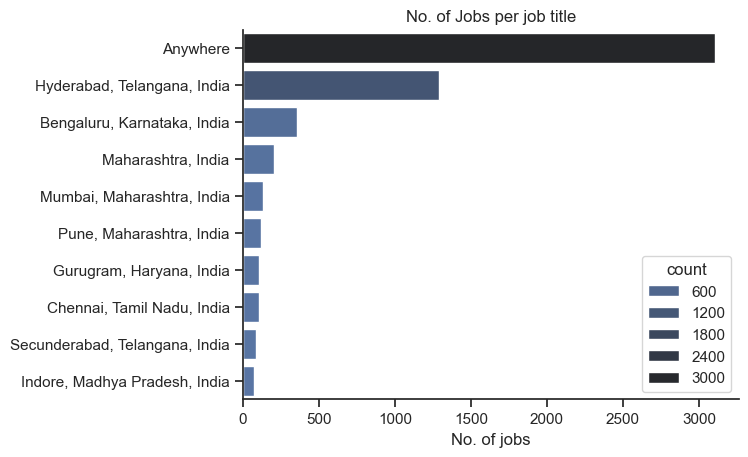

In [31]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette='dark:b_r')
sns.despine()
plt.title('No. of Jobs per job title')
plt.xlabel('No. of jobs')
plt.ylabel('')
plt.show()



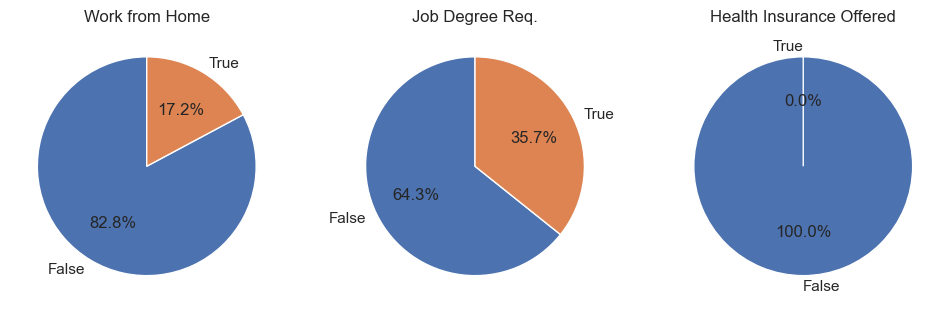

In [44]:

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))


for i,(column, title) in enumerate(dict_column.items()):
    counts = df_DA_India[column].value_counts()
    values = [counts.get(False, 0), counts.get(True, 0)]  # Handle missing True/False
    ax[i].pie(values, labels = ['False', 'True'], startangle = 90, autopct = '%1.1f%%')
    ax[i].set_title(title)

plt.show()

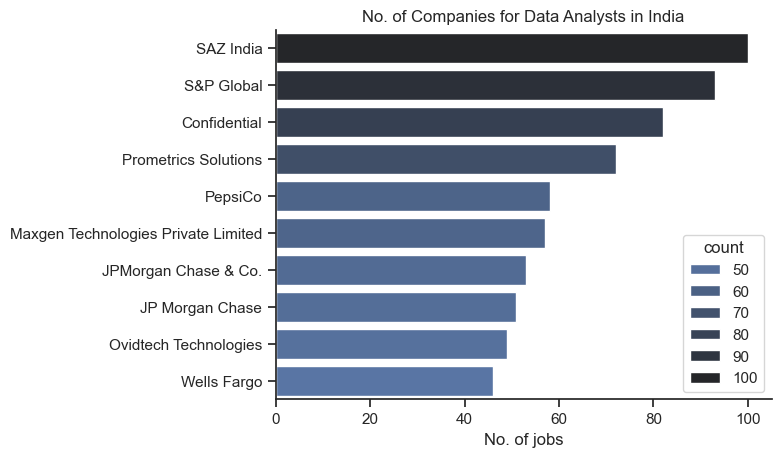

In [46]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette='dark:b_r')
sns.despine()
plt.title('No. of Companies for Data Analysts in India')
plt.xlabel('No. of jobs')
plt.ylabel('')
plt.show()
